# Madrid house price prediction

En este proyecto de ciencia de datos, hemos llevado a cabo un análisis detallado de un conjunto de datos de ventas de viviendas en el condado de King, con el propósito de desarrollar un modelo predictivo preciso para estimar los precios de las propiedades. A través de un exhaustivo Análisis Exploratorio de Datos (EDA), hemos obtenido una comprensión profunda de las características y relaciones clave entre las variables. Ahora, nos encontramos en una fase crucial: la construcción, evaluación y selección del modelo más adecuado para el pronóstico.

## 1. Contexto


## 2. Datos
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### 2.1 Carga de datos

In [173]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Importing ML libraries and metrics
from math import sqrt
# from tqdm import tqdm
# import lightgbm as lgb
# import xgboost as xgb
# from lightgbm import early_stopping, log_evaluation
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
import shap


In [174]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [175]:
X_train= pd.read_csv('./data/X_train_scaled.csv',sep=";",index_col=False)
X_val= pd.read_csv('./data/X_val_scaled.csv',sep=";",index_col=False)
X_test= pd.read_csv('./data/X_test_scaled.csv',sep=";",index_col=False)


In [176]:
# Basic dataset information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hog_con_15_y_más                  6316 non-null   float64
 1   codigo_postal                     6316 non-null   float64
 2   serv_barrio                       6316 non-null   float64
 3   m2_por_hab                        6316 non-null   float64
 4   energia                           6316 non-null   float64
 5   habitantes                        6316 non-null   float64
 6   renta_bruta_media_por_persona     6316 non-null   float64
 7   atrib_lujo                        6316 non-null   float64
 8   viv_nuevas_transacciones          6316 non-null   float64
 9   planta                            6316 non-null   float64
 10  ins_comunitaria                   6316 non-null   float64
 11  atrib                             6316 non-null   float64
 12  num_pe

In [177]:
# Identifying the unique number of values in the dfset
X_train.nunique()

hog_con_15_y_más                      17
codigo_postal                         49
serv_barrio                           21
m2_por_hab                           976
energia                                5
habitantes                            21
renta_bruta_media_por_persona         21
atrib_lujo                             8
viv_nuevas_transacciones              58
planta                                26
ins_comunitaria                        3
atrib                                 28
num_personas                         131
diferencia_precio_renta              151
estado                                 6
m2_areasverdes                        21
cod_barrio                           131
cod_distrito                          21
m2_constr                            507
habitaciones                          24
total_transacciones                  122
precio_mean_b                        131
tamano_medio_del_hogar                18
total_estaciones                      21
hog_con_10      

### 2.2 Análisis de datos

In [178]:
# Viewing the df statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
hog_con_15_y_más,6316.00,-0.09,0.68,-1.60,-0.55,0.00,0.45,1.00
codigo_postal,6316.00,0.18,0.66,-0.70,-0.35,0.00,0.65,1.65
serv_barrio,6316.00,0.14,0.90,-1.26,-0.57,0.00,0.43,1.73
m2_por_hab,6316.00,0.31,1.60,-1.67,-0.39,0.00,0.61,68.76
energia,6316.00,0.28,0.76,0.00,0.00,0.00,0.00,4.00
habitantes,6316.00,0.33,0.81,-1.65,-0.10,0.00,0.90,1.99
renta_bruta_media_por_persona,6316.00,0.04,0.54,-0.80,-0.42,0.00,0.58,0.91
atrib_lujo,6316.00,0.25,0.99,-1.00,0.00,0.00,1.00,6.00
viv_nuevas_transacciones,6316.00,0.95,3.07,-0.33,-0.24,0.00,0.76,32.03
planta,6316.00,0.29,1.13,-1.50,-0.50,0.00,0.50,12.50


C:\Users\extas\AppData\Local\Temp\ipykernel_16724\3380500756.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(X_train['target'], kde=True, palette='Set1')


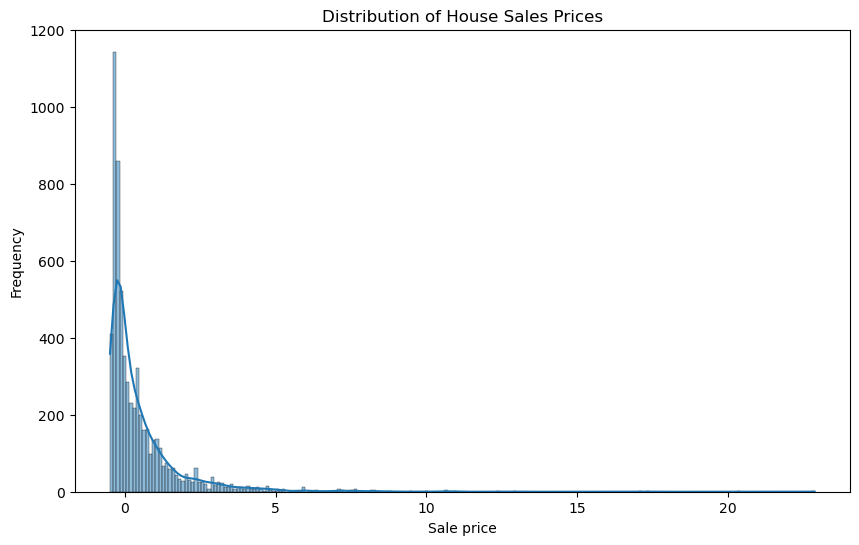

In [179]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(X_train['target'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [180]:
# Finding out the correlation between the features
#quitamos url
corr =  X_train.drop(columns=['url']).corr()

corr

,hog_con_15_y_más,codigo_postal,serv_barrio,m2_por_hab,energia,habitantes,renta_bruta_media_por_persona,atrib_lujo,viv_nuevas_transacciones,planta,ins_comunitaria,atrib,num_personas,diferencia_precio_renta,estado,m2_areasverdes,cod_barrio,cod_distrito,m2_constr,habitaciones,total_transacciones,precio_mean_b,tamano_medio_del_hogar,total_estaciones,hog_con_10,eficiencia_carpinteria,lineas_metro,tam_hogar,amueblado,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,tipologia_Atico,tipologia_Chalet,tipologia_Piso,tipologia_infrequent_sklearn,antiguedad_10_30,antiguedad_30_50,antiguedad_Desconocido,antiguedad_mas_50,antiguedad_infrequent_sklearn,tipo_inmueble_Desconocido,tipo_inmueble_lujo,tipo_inmueble_infrequent_sklearn,aire_Desconocido,aire_Normal,aire_infrequent_sklearn,tipo_suelo_Desconocido,tipo_suelo_Madera,tipo_suelo_infrequent_sklearn,grupo_cocina_Desconocido,grupo_cocina_Independiente,grupo_cocina_infrequent_sklearn,target
hog_con_15_y_más,1.00,-0.07,-0.12,0.06,-0.01,0.45,-0.01,-0.13,-0.09,-0.06,-0.01,-0.02,0.10,-0.03,-0.07,0.31,-0.18,-0.19,0.09,0.05,0.14,-0.03,-0.12,0.57,0.47,-0.03,0.22,0.56,-0.01,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.08,-0.06,0.03,0.02,-0.01,-0.01,0.00,-0.00,-0.01,0.02,-0.01,0.01,-0.02,0.02,0.05,-0.05,-0.01,0.01,0.03,-0.04,-0.02
codigo_postal,-0.07,1.00,-0.44,-0.07,0.05,0.42,-0.54,0.17,0.26,-0.10,0.02,-0.03,0.21,-0.54,0.03,0.13,0.56,0.56,-0.07,-0.12,-0.01,-0.54,0.55,0.44,0.40,-0.07,-0.59,-0.24,-0.16,0.03,0.02,0.02,0.02,0.02,-0.03,0.10,-0.09,0.08,0.11,0.06,-0.03,-0.05,0.02,0.13,-0.24,0.13,0.07,-0.08,0.03,-0.03,-0.01,0.06,0.00,0.09,-0.09,-0.32
serv_barrio,-0.12,-0.44,1.00,0.04,-0.05,-0.16,0.49,-0.06,-0.22,0.07,-0.01,0.05,-0.15,0.47,-0.04,-0.29,-0.34,-0.35,0.03,0.08,0.04,0.47,-0.44,-0.37,-0.38,0.05,0.51,0.30,0.11,0.01,-0.00,0.00,-0.00,-0.03,0.01,-0.10,0.09,-0.07,-0.09,-0.05,0.02,0.05,-0.01,-0.13,0.18,-0.05,-0.05,0.06,-0.03,0.02,0.03,-0.08,0.00,-0.07,0.05,0.28
m2_por_hab,0.06,-0.07,0.04,1.00,-0.05,-0.07,0.20,0.15,-0.03,-0.02,-0.06,0.02,-0.11,0.24,-0.03,0.11,-0.07,-0.07,0.66,0.20,-0.08,0.24,-0.04,0.06,-0.13,0.03,0.11,-0.03,0.00,-0.01,0.00,-0.01,0.02,-0.01,0.10,0.25,-0.27,0.12,0.04,-0.01,0.03,-0.06,0.05,-0.11,0.17,-0.06,-0.02,0.01,0.02,0.05,-0.02,-0.06,-0.00,0.01,0.00,0.44
energia,-0.01,0.05,-0.05,-0.05,1.00,0.04,-0.08,0.08,-0.01,-0.04,0.03,0.16,0.01,-0.07,0.13,-0.03,0.05,0.05,-0.04,-0.04,-0.01,-0.07,0.04,0.01,0.06,0.23,-0.07,-0.01,0.13,-0.01,0.14,0.12,0.17,0.06,-0.01,0.03,-0.02,0.01,0.04,0.05,-0.16,0.12,0.07,0.09,-0.11,0.01,-0.23,0.23,0.07,-0.38,0.30,0.22,-0.21,0.08,0.21,-0.05
habitantes,0.45,0.42,-0.16,-0.07,0.04,1.00,-0.48,0.05,0.05,-0.08,0.03,-0.05,0.42,-0.36,-0.02,-0.08,0.28,0.28,-0.08,-0.11,0.18,-0.36,0.43,0.70,0.78,-0.05,-0.46,0.34,-0.10,0.00,-0.00,-0.00,0.00,0.01,-0.04,0.03,0.01,-0.00,0.05,0.05,-0.04,-0.00,-0.01,0.08,-0.15,0.09,0.06,-0.07,0.02,-0.03,-0.01,0.06,0.02,0.05,-0.07,-0.21
renta_bruta_media_por_persona,-0.01,-0.54,0.49,0.20,-0.08,-0.48,1.00,0.08,-0.25,0.10,-0.02,0.07,-0.36,0.75,-0.04,0.11,-0.56,-0.56,0.27,0.29,-0.19,0.76,-0.43,-0.11,-0.78,0.09,0.68,-0.02,0.10,-0.01,0.02,0.03,0.04,0.02,0.04,0.08,-0.08,0.03,-0.08,-0.07,0.06,0.01,0.01,-0.18,0.30,-0.13,-0.11,0.11,0.01,0.06,0.00,-0.11,-0.03,-0.04,0.08,0.45
atrib_lujo,-0.13,0.17,-0.06,0.15,0.08,0.05,0.08,1.00,0.10,0.01,-0.04,0.19,0.01,0.08,0.12,0.18,0.26,0.26,0.28,0.26,-0.12,0.08,0.35,0.17,-0.05,0.16,-0.16,-0.35,-0.02,0.10,0.09,0.05,0.12,0.05,0.07,0.18,-0.22,0.13,0.18,0.13,-0.18,0.01,0.16,-0.01,-0.01,0.02,-0.16,0.15,0.11,-0.11,0.12,0.00,-0.13,0.10,0.07,0.18
viv_nuevas_transacciones,-0.09,0.26,-0.22,-0.03,-0.01,0.05,-0.25,0.10,1.00,0.01,0.00,-0.02,0.21,-0.21,0.10,0.03,0.33,0.33,-0.05,-0.05,0.53,-0.21,0.25,0.04,0.14,-0.03,-0.32,-0.20,-0.06,-0.01,-0.02,0.00,-0.04,-0.01,0.03,0.03,-0.05,0.02,0.09,-0.01,0.01,-0.07,0.07,0.06,-0.09,0.02,0.05,-0.05,-0.00,0.01,-0.01,0.01,0.03,-0.00,-0.04,-0.13
planta,-0.06,-0.10,0.07,-0.02,-0.04,-0.08,0.10,0.01,0.01,1.00,0.00,0.04,-0.02,0.04,0.05,-0.03,-0.03,-0.04,-0.10,-0.08,0.01,0.04

<Axes: >

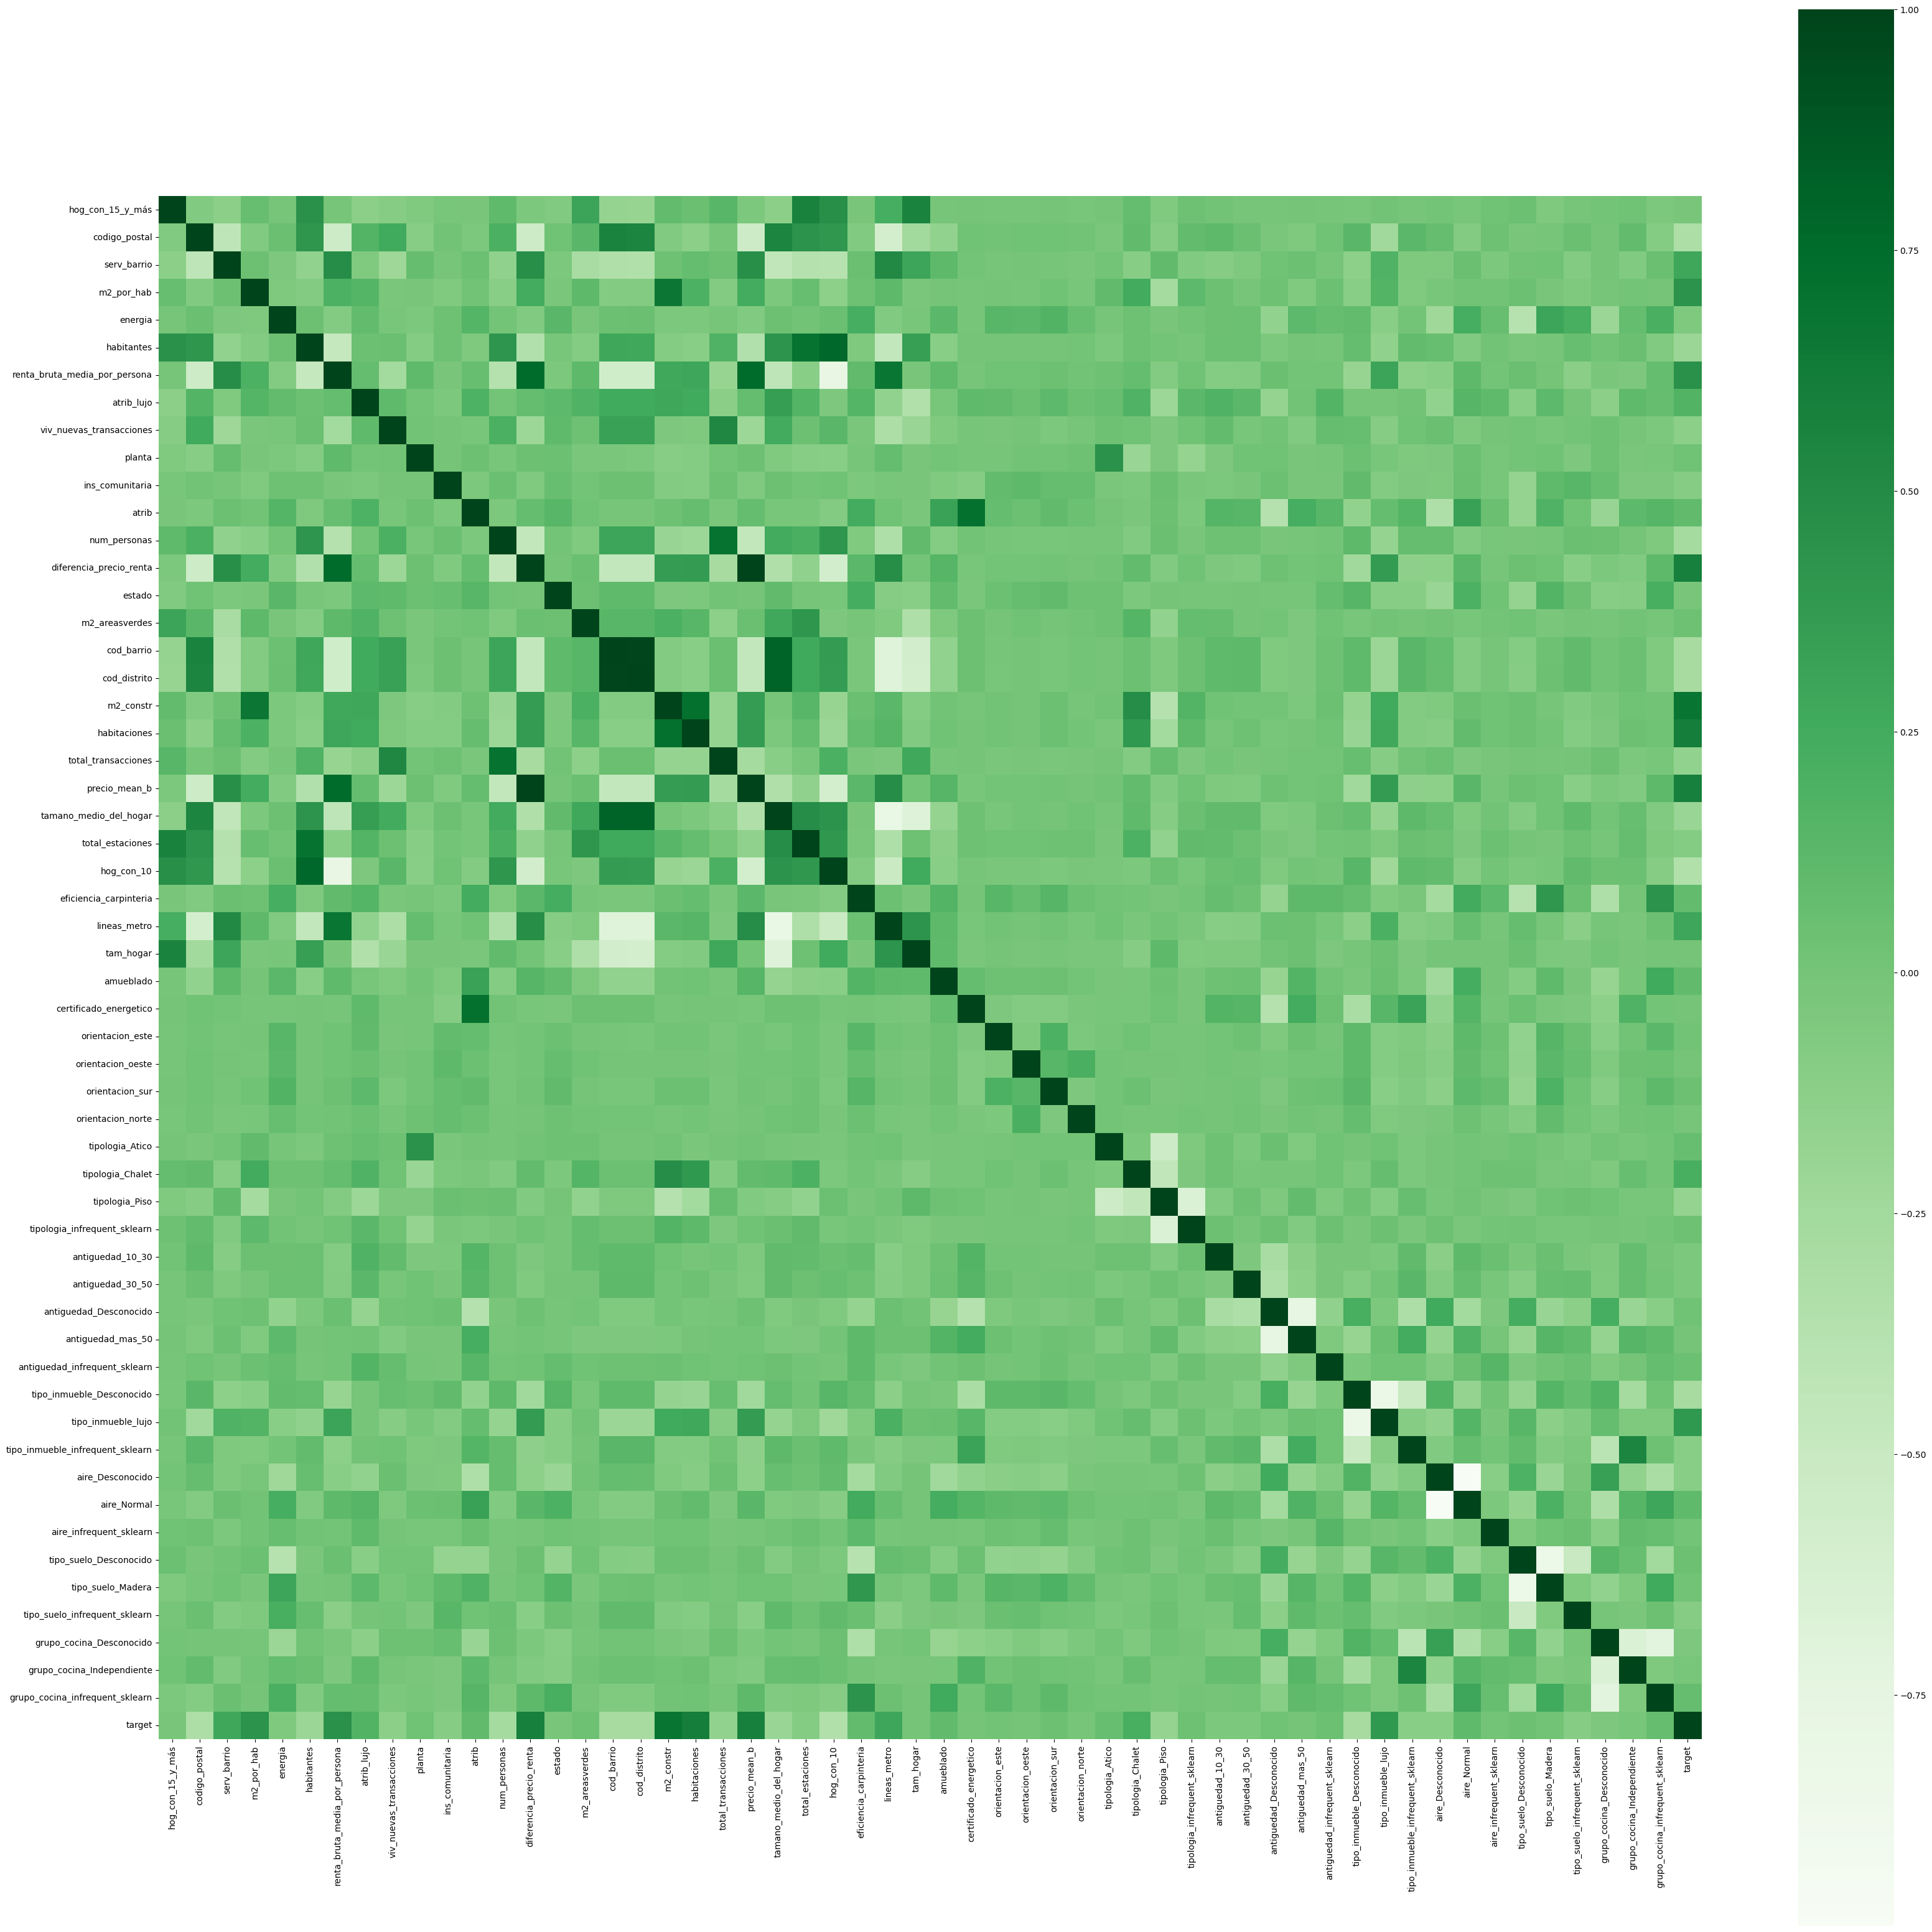

In [181]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=False, annot_kws={'size':15}, cmap='Greens')

In [182]:
corr[['target']].sort_values(by = 'target',ascending = False).style.background_gradient()

,target
target,1.000000
m2_constr,0.681816
habitaciones,0.608864
precio_mean_b,0.592094
diferencia_precio_renta,0.592049
renta_bruta_media_por_persona,0.449989
m2_por_hab,0.435971
tipo_inmueble_lujo,0.392998
lineas_metro,0.285117
serv_barrio,0.278381


In [183]:
corr_precio = corr.loc['target']
columnas_seleccionadas = corr_precio[(corr_precio > 0.19) | (corr_precio < -0.19)].index

print(columnas_seleccionadas)

Index(['codigo_postal', 'serv_barrio', 'm2_por_hab', 'habitantes',
       'renta_bruta_media_por_persona', 'num_personas',
       'diferencia_precio_renta', 'cod_barrio', 'cod_distrito', 'm2_constr',
       'habitaciones', 'precio_mean_b', 'tamano_medio_del_hogar', 'hog_con_10',
       'lineas_metro', 'tipologia_Chalet', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_lujo', 'target'],
      dtype='object')


In [157]:
#Elimino las columnas

 #[cod_distrito,cod_barrio]

### 2.3 Extracción de la variable target en train / test

In [184]:
X_train['target'].head()

0    2.61
1    0.42
2    0.73
3   -0.33
4    1.02
Name: target, dtype: float64

In [185]:
#cod_barrio y cod_distrito son variables categoricas que puede interpretar como numerica

df_ids = X_train[['url']]
y_train=X_train['target']
y_test=X_test['target']
y_val=X_val['target']
X_train = X_train.drop(columns=["url","target","cod_barrio","cod_distrito","codigo_postal"])
X_test = X_test.drop(columns=["url","target","cod_barrio","cod_distrito","codigo_postal"])
X_val = X_val.drop(columns=["url","target","cod_barrio","cod_distrito","codigo_postal"])


In [186]:
# Ajustar las configuraciones de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el ajuste a nuevas líneas

#### Entrenamiento

In [187]:
#from sklearn.linear_model import LinearRegression
# Create a Linear regressor
lm = LinearRegression()

# 2. Inicializar RFE con el modelo y seleccionar las mejores 5 características
selector = RFE(lm, n_features_to_select=10)

# 3. Ajustar el selector a los datos de entrenamiento (esto realiza la selección)
selector = selector.fit(X_train, y_train)

# 4. Obtener las columnas seleccionadas
selected_columns = X_train.columns[selector.support_]

# 5. Imprimir las variables más importantes
print("Variables más importantes:", selected_columns)


# Train the model using the training sets
lm.fit(X_train, y_train)


Variables más importantes: Index(['habitantes', 'diferencia_precio_renta', 'm2_constr', 'habitaciones',
       'precio_mean_b', 'total_estaciones', 'tipologia_Atico',
       'tipologia_Chalet', 'tipologia_Piso', 'tipo_inmueble_lujo'],
      dtype='object')


LinearRegression()

In [170]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients_sorted = coeffcients.sort_values(by='Coefficients', ascending=True)
coeffcients

,Attribute,Coefficients
0,hog_con_15_y_más,-0.06
1,serv_barrio,0.05
2,m2_por_hab,0.04
3,energia,-0.00
4,habitantes,0.07
5,renta_bruta_media_por_persona,0.17
6,atrib_lujo,0.02
7,viv_nuevas_transacciones,-0.02
8,planta,0.02
9,ins_comunitaria,-0.12


### 3.2 Evaluación sobre train

In [188]:
# Model prediction on train df
y_pred = lm.predict(X_train)

In [189]:

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6647932678333015
MAE: 0.38741698468806046
MSE: 0.6286239087645024
RMSE: 0.7928580634416871


In [165]:
#Evaluacion sobre validacion

In [190]:
# Model prediction on val df
y_pred_val = lm.predict(X_val)
# Model Evaluation
print('R^2:',metrics.r2_score(y_val, y_pred_val))
print('MAE:',metrics.mean_absolute_error(y_val, y_pred_val))
print('MSE:',metrics.mean_squared_error(y_val, y_pred_val))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

R^2: 0.7116932334180424
MAE: 0.3809403574573358
MSE: 0.4688603860653314
RMSE: 0.6847338067200505


Evaluacion sobre test

In [191]:
# Predicting Test df with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5770321449824297
MAE: 0.3988705105399877
MSE: 0.8784441593710062
RMSE: 0.937253519263068


# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Vamos a entrenar varios modelos de Regresión con los hiperparametros por defecto para ver cual de ellos se adapta mejor a nuestros datos.

In [169]:

# Se seleccionan los siguientes modelos de Regresión

# Template list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),  
    "LGBM Regressor": lgb.LGBMRegressor()
}

# Diccionario para almacenar métricas
metrics = {}

# Diccionario para guardar la importancia de características
feature_importance_dict = {}

# Entrenamos y evaluamos los  modelos
for nome, modelo in models.items():
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en test
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar métricas
    metrics[nome] = {"R2": r2, "MAE": mae, "RMSE": rmse}
    
    # Comprobar si el modelo tiene feature_importances_
    if hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_
        nomes_features = np.array(X_train.columns)

        # Ordenar las características por importancia
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Guardar importancia de características en el diccionario
        feature_importance_dict[nome] = (nomes_features, importancias)

# Convertir métricas en un DataFrame y ordenar por R² descendente
df_metrics = pd.DataFrame(metrics).T.sort_values(by="R2", ascending=False)

# Mostrar las métricas
print(df_metrics)

# Seleccionar los 3 mejores modelos según R²
top_3_models = df_metrics.index[:3]

# Graficar la importancia de características de los 3 mejores modelos
for model_name in top_3_models:
    if model_name in feature_importance_dict:  # Verificar si tiene feature_importances_
        nomes_features, importancias = feature_importance_dict[model_name]
        
        # Seleccionar las 10 características más importantes
        num_features = min(10, len(nomes_features))
        importancias_top = importancias[-num_features:]
        nomes_features_top = nomes_features[-num_features:]

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.barh(range(num_features), importancias_top, align='center')
        plt.yticks(range(num_features), nomes_features_top)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {model_name}')
        plt.grid(False)
        plt.show()


NameError: name 'DecisionTreeRegressor' is not defined

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 7896, number of used features: 63
[LightGBM] [Info] Start training from score 0.482926
                  R2_Test  MAE RMSE
LGBM Regressor       0.81 0.25 0.63
Random Forest        0.78 0.23 0.68
XGBoost              0.75 0.27 0.71
Gradient Boosting    0.74 0.27 0.74

Mejores hiperparámetros por modelo:
Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Gradient Boosting: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
LGBM Regressor: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.1

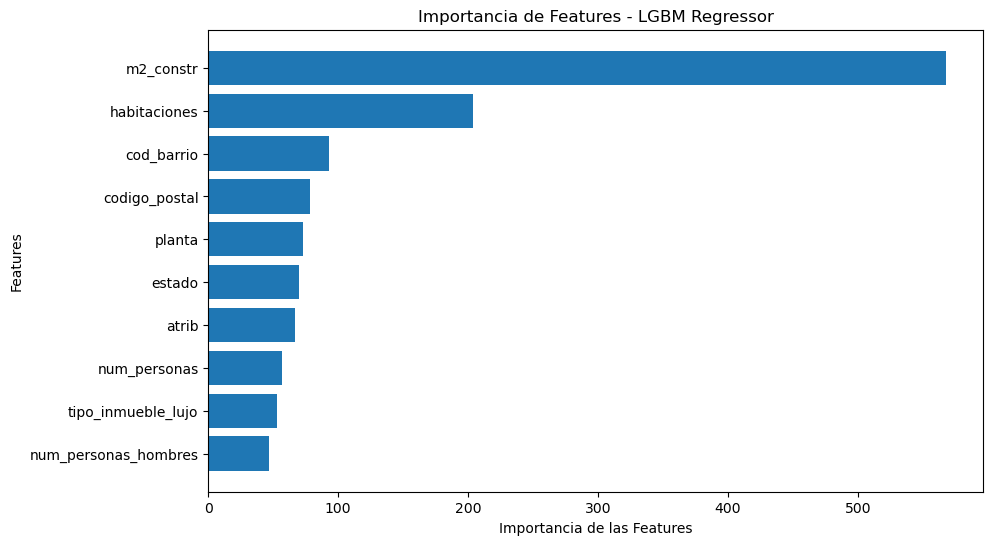

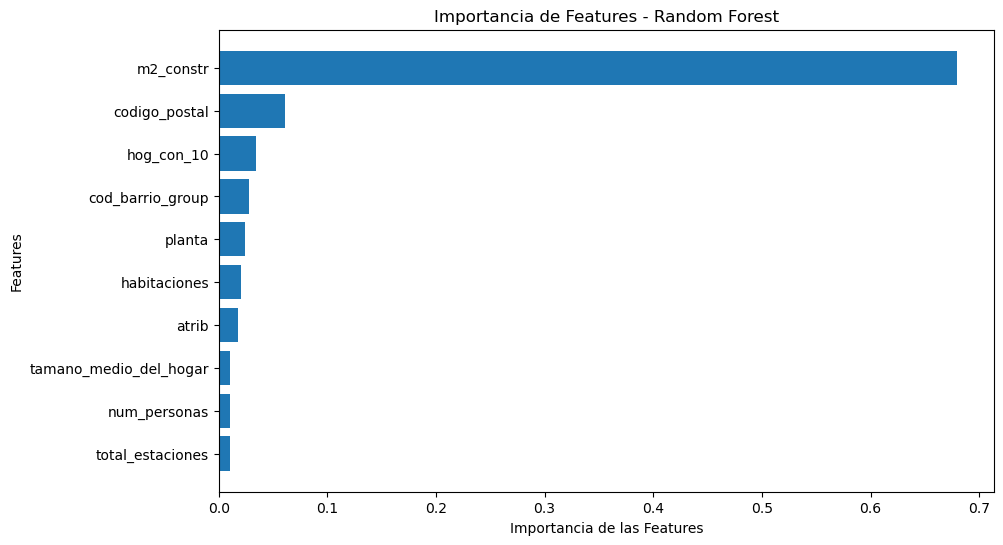

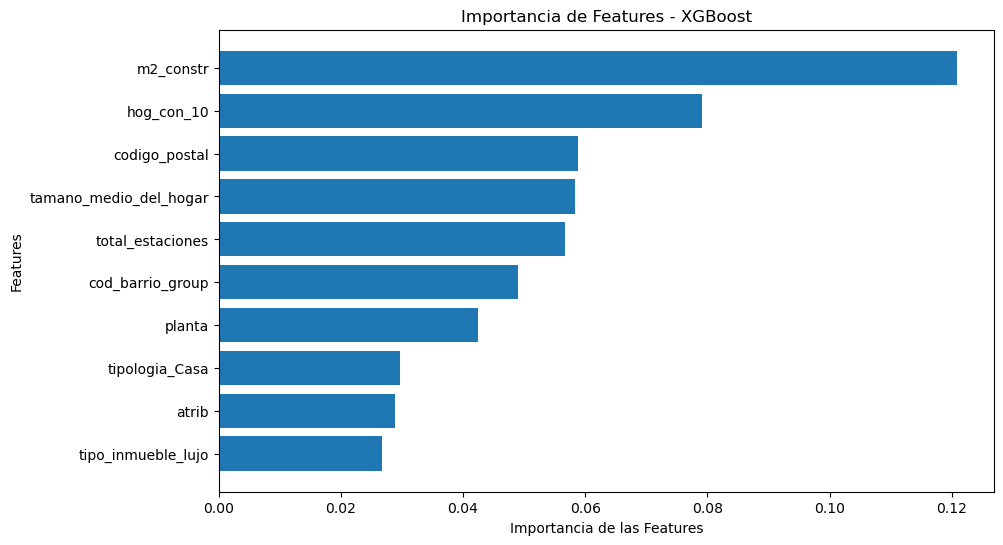

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, KFold
# Template list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),    
    "LGBM Regressor": lgb.LGBMRegressor()
}
# Modelos y sus hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 4, 5, 6]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 4, 5, 6],
            "subsample": [0.7, 0.8, 0.9, 1.0]
        }
    },
          
    "LGBM Regressor": {
        "model": lgb.LGBMRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "num_leaves": [20, 31, 40, 50],
            "max_depth": [-1, 10, 20, 30]
        }
    }
}

# Configurar validación cruzada con 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar métricas
metrics = {}

# Diccionario para guardar la importancia de características
feature_importance_dict = {}

# Loop para entrenar y evaluar modelos
for nome, info in models_params.items():
    modelo = info["model"]
    param_dist = info["params"]
    
    # RandomizedSearchCV para búsqueda de hiperparámetros
    random_search = RandomizedSearchCV(modelo, param_dist, cv=4, n_iter=10, scoring="r2", random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Mejor modelo encontrado
    best_model = random_search.best_estimator_

    # Predecir en test
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    r2_test = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar métricas
    metrics[nome] = {
        "R2_Test": r2_test,  
        "MAE": mae,
        "RMSE": rmse,
        "Best_Params": random_search.best_params_
    }
    
    # Comprobar si el modelo tiene feature_importances_
    if hasattr(best_model, 'feature_importances_'):
        importancias = best_model.feature_importances_
        nomes_features = np.array(X_train.columns)

        # Ordenar características por importancia
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Guardar importancia de características en el diccionario
        feature_importance_dict[nome] = (nomes_features, importancias)

# Convertir métricas en un DataFrame y ordenar por R²
df_metrics = pd.DataFrame(metrics).T.sort_values(by="R2_Test", ascending=False)

# Mostrar métricas y mejores hiperparámetros
print(df_metrics[["R2_Test", "MAE", "RMSE"]])
print("\nMejores hiperparámetros por modelo:")
for modelo, valores in metrics.items():
    print(f"{modelo}: {valores['Best_Params']}")

# Seleccionar los 3 mejores modelos según R² en test
top_3_models = df_metrics.index[:3]

# Graficar la importancia de características de los 3 mejores modelos
for model_name in top_3_models:
    if model_name in feature_importance_dict:  # Verificar si tiene feature_importances_
        nomes_features, importancias = feature_importance_dict[model_name]
        
        # Seleccionar las 10 características más importantes
        num_features = min(10, len(nomes_features))
        importancias_top = importancias[-num_features:]
        nomes_features_top = nomes_features[-num_features:]

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.barh(range(num_features), importancias_top, align='center')
        plt.yticks(range(num_features), nomes_features_top)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {model_name}')
        plt.grid(False)
        plt.show()


In [ ]:
explainer = shap.TreeExplainer(best_model) # Instanciamos explicador
shap_values = explainer(X_train) # Se obtienen las explicaciones (SHAP values)
y_pred_raw = best_model.predict(
    X_train,    
)


# Comprobamos que los SHAP values suman las predicciones marginales
np.abs(shap_values.values.sum(axis = 1) + shap_values.base_values - y_pred_raw).max()

2.220446049250313e-14

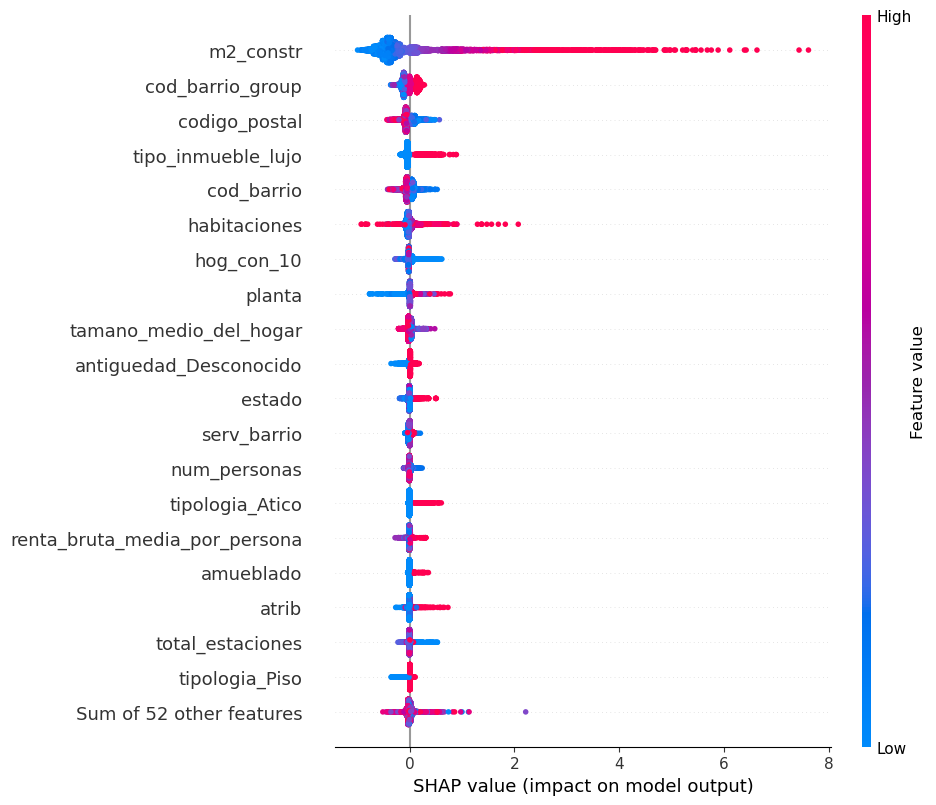

In [ ]:
# Gráfico de importancia por variable para cada una de las observaciones
shap.plots.beeswarm(shap_values, max_display = 20)

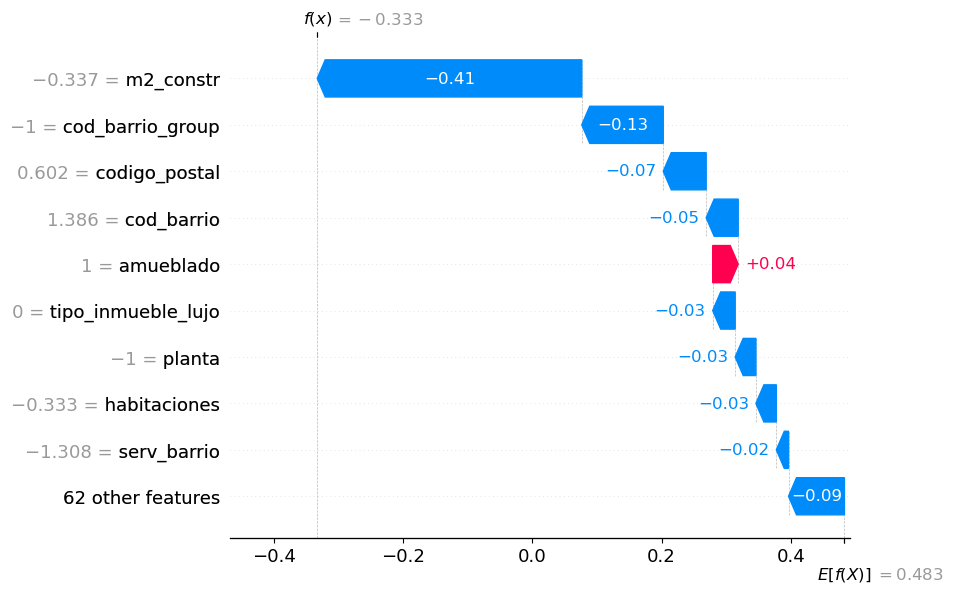

In [ ]:
# Gráfico para ver cómo se pasa del explainer.expected_value al model.predict(X)[ind_obs]
ind_obs = 100
shap.plots.waterfall(shap_values[ind_obs])

Vamos a entrenar y evaluar varios modelos de regresión utilizando los hiperparámetros predeterminados, calcular sus métricas de rendimiento, y graficar la importancia de las características para los modelos que la soportan. 

Aplicamos ocho modelos de aprendizaje automático para la tarea de regresión.
Los modelos incluidos son: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Regresor KNN, Gradient Boosting, XGBoost, AdaBoost y LightGBM Regressor. 
Cada modelo se entrena y evalua utilizando técnicas de validación cruzada para garantizar una evaluación sólida de su rendimiento.
Se consideran diversas métricas para evaluar la calidad de las predicciones de cada modelo, incluyendo el coeficiente de determinación (R²), el error cuadrático medio (RMSE), entre otros.


Los resultados indican que el modelo con mejor desempeño es xxxxxxx, logrando un R² de xxxxx%.
A continuación, el xxxxxxx obtuvo un R² del xxxxx%.
Estos resultados reflejan la capacidad de estos modelos para capturar y predecir patrones en los datos de manera efectiva.

8. Features importantes

Analizamos las variables o atributos que tienen un impacto significativo en la predicción o explicación de un resultado específico en un modelo estadístico o de aprendizaje automático. Estas características se seleccionan en función de su capacidad para influir en la variable objetivo y aportar información útil al modelo. 
